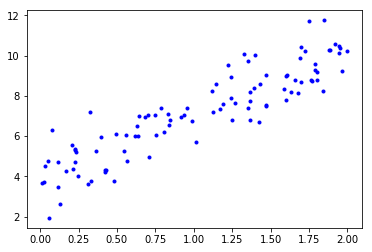

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand( 100, 1 )
y = 4 + 3 * (X) + np.random.randn(100,1)

#print( X )
#print( y )

# plot
plt.plot(X, y, "b.")

In [4]:
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.91959805],
       [3.16966466]])

In [5]:
# make some predictions
X_new = np.array([[0],[2]])
print( X_new )

X_new_b = np.c_[np.ones((2,1)), X_new]
print (X_new_b)

y_predict = X_new_b.dot(theta_best)
print(y_predict)

[[0]
 [2]]
[[1. 0.]
 [1. 2.]]
[[ 3.91959805]
 [10.25892737]]


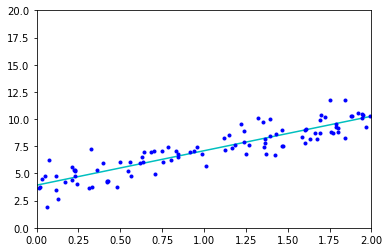

In [6]:
plt.plot(X_new, y_predict, "c-")
plt.plot(X, y, "b.")
plt.axis([0,2,0,20])
plt.show()

In [7]:
# OK, so line looks like a good fit, let's try the same thing
# with the linear regression

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([3.91959805]), array([[3.16966466]]))

In [8]:
lin_reg.predict(X_new)

array([[ 3.91959805],
       [10.25892737]])

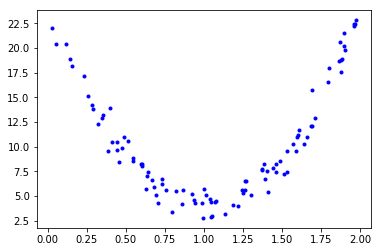

In [10]:
# so that works, but let's try again with quadratic data
def true_fun(X):
    return 4 + 20 * (X-1)**2

X = 2 * np.sort(np.random.rand( 100, 1 ))
y = true_fun(X) + np.random.randn(100,1)

plt.plot(X, y, "b.")



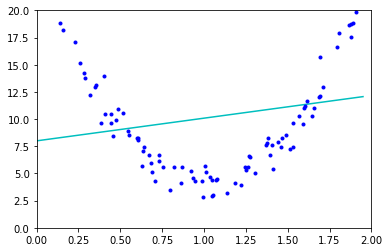

In [11]:
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

# make some predictions
X_new = np.arange(0,2, 0.05)
#print( X_new )

X_new_b = np.c_[np.ones((40,1)), X_new]
#print (X_new_b)

y_predict = X_new_b.dot(theta_best)
#print(y_predict)

plt.plot(X_new, y_predict, "c-")
plt.plot(X, y, "b.")
plt.axis([0,2,0,20])
plt.show()



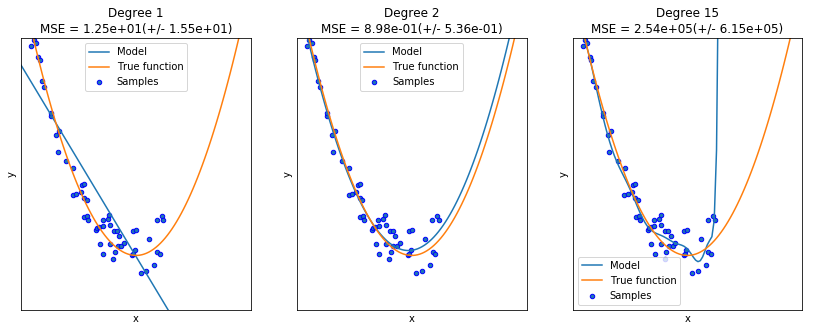

In [13]:
# OK so line is bad fit, let's try higher-order model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return 4 + 20 * (X-1)**2

np.random.seed(0)

n_samples = 60
degrees = [1, 2, 15]

X = np.sort(np.random.rand(n_samples))*1.25
y = true_fun(X) + np.random.randn(n_samples) * 1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 2, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 2))
    plt.ylim((0, 20))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()


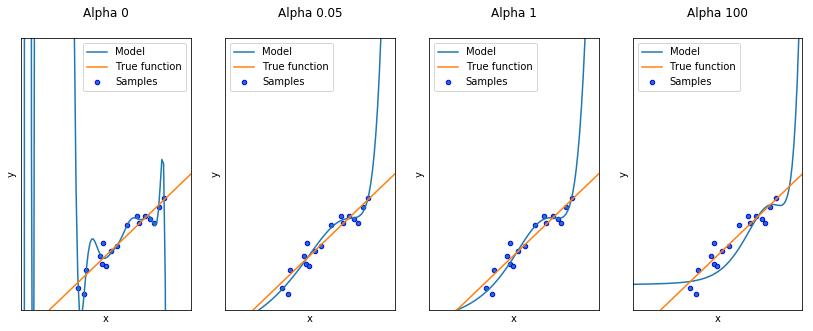

In [14]:
#now we'll work with regularization (Ridge Regression)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

def true_fun(X):
    return 4 + 3 * (X-1)*2

np.random.seed(0)

n_samples = 20
alphas = [0, .05, 1, 100]

X = np.sort(np.random.rand(n_samples))*1.75
y = true_fun(X) + np.random.randn(n_samples) * .5

plt.figure(figsize=(14, 5))
for i in range(len(alphas)):
    ax = plt.subplot(1, len(alphas), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    model = make_pipeline(PolynomialFeatures(14), Ridge(alpha=alphas[i], solver="cholesky"))
    model.fit(X[:,np.newaxis], y)


    X_test = np.linspace(0, 2, 100)
    plt.plot(X_test, model.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 2))
    plt.ylim((0, 20))
    plt.legend(loc="best")
    plt.title("Alpha {}\n".format(
        alphas[i]))
plt.show()
